In [1]:
from keras import layers
from keras import models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [15]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 13s 10ms/step - loss: 0.5398 - accuracy: 0.8015
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3111 - accuracy: 0.8867
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2535 - accuracy: 0.9064
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2207 - accuracy: 0.9193
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1942 - accuracy: 0.9284
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1732 - accuracy: 0.9362
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1561 - accuracy: 0.9427
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1403 - accuracy: 0.9489
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1244 - accuracy: 0.9542
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1107 - accuracy: 0.95

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
print(test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.9177
0.9176999926567078
0.2502831816673279


In [40]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1" or "block5_conv2" or "block5_conv3" or "block5_pool":
        set_trainable = True
    if layer.name == "block4_conv3" or "block4_conv2" or "block4_conv1" or "block4_pool":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

In [3]:
import numpy as np
import pandas as pd
train_data = pd.read_csv('C:/Users/kuzik/Desktop/hw12/fashion-mnist_train.csv')
test_data = pd.read_csv('C:/Users/kuzik/Desktop/hw12/fashion-mnist_test.csv')
train_X= np.array(train_data.iloc[:,1:])
test_X= np.array(test_data.iloc[:,1:])
train_Y= np.array (train_data.iloc[:,0]) # (60000,)
test_Y = np.array(test_data.iloc[:,0]) #(10000,)

In [4]:
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [5]:
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape, test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [6]:
from keras.utils import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32, 32))) for im in test_X])
train_X.shape, test_X.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [9]:
# from tensorflow.keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [10]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X,
                                                              train_Y_one_hot,
                                                              test_size=0.2,
                                                              random_state=13
                                                              )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 32, 32, 3), (12000, 32, 32, 3), (48000, 10), (12000, 10))

In [11]:
train_X = train_X.astype("float32") / 255
valid_X = valid_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255

In [12]:
train_label.shape

(48000, 10)

In [41]:
history = model.fit(train_X, train_label, epochs=100, batch_size=64, validation_data=(valid_X, valid_label))

Epoch 1/100
750/750 [==============================] - 32s 37ms/step - loss: 0.3264 - acc: 0.1221 - val_loss: 0.3185 - val_acc: 0.1729
Epoch 2/100
750/750 [==============================] - 27s 36ms/step - loss: 0.2553 - acc: 0.3300 - val_loss: 0.2432 - val_acc: 0.3587
Epoch 3/100
750/750 [==============================] - 27s 36ms/step - loss: 0.1803 - acc: 0.5572 - val_loss: 0.1404 - val_acc: 0.6783
Epoch 4/100
750/750 [==============================] - 27s 36ms/step - loss: 0.1393 - acc: 0.6781 - val_loss: 0.1128 - val_acc: 0.7597
Epoch 5/100
750/750 [==============================] - 27s 36ms/step - loss: 0.1156 - acc: 0.7421 - val_loss: 0.1269 - val_acc: 0.7224
Epoch 6/100
750/750 [==============================] - 27s 36ms/step - loss: 0.1012 - acc: 0.7784 - val_loss: 0.0936 - val_acc: 0.8017
Epoch 7/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0910 - acc: 0.8023 - val_loss: 0.0855 - val_acc: 0.8133
Epoch 8/100
750/750 [==============================] - 

750/750 [==============================] - 27s 36ms/step - loss: 0.0183 - acc: 0.9656 - val_loss: 0.0718 - val_acc: 0.9038
Epoch 62/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0191 - acc: 0.9661 - val_loss: 0.0582 - val_acc: 0.9091
Epoch 63/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0180 - acc: 0.9664 - val_loss: 0.0688 - val_acc: 0.9068
Epoch 64/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0180 - acc: 0.9659 - val_loss: 0.0557 - val_acc: 0.9037
Epoch 65/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0177 - acc: 0.9674 - val_loss: 0.0920 - val_acc: 0.9064
Epoch 66/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0175 - acc: 0.9674 - val_loss: 0.0741 - val_acc: 0.9133
Epoch 67/100
750/750 [==============================] - 27s 36ms/step - loss: 0.0173 - acc: 0.9686 - val_loss: 0.0655 - val_acc: 0.9158
Epoch 68/100
750/750 [==============================] - 27s 3

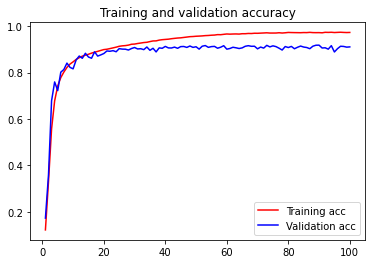

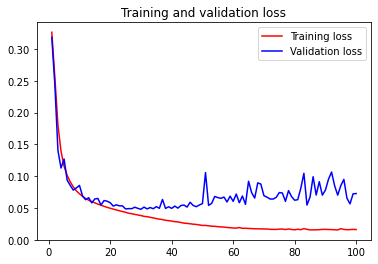

In [43]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [45]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print("test acc:", test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0792 - acc: 0.9116
test acc: 0.9115999937057495
